In [1]:
import sys                                         #初始化环境变量
nets_path = r'./slim'
if nets_path not in sys.path:
    sys.path.insert(0,nets_path)
else:
    print('already add slim')

import tensorflow as tf                           #引入头文件
from PIL import Image
from matplotlib import pyplot as plt
from nets.nasnet import pnasnet
import numpy as np
from datasets import imagenet
slim = tf.contrib.slim



tf.reset_default_graph()

image_size = pnasnet.build_pnasnet_large.default_image_size   #获得图片输入尺寸
labels = imagenet.create_readable_names_for_imagenet_labels() #获得数据集标签
print(len(labels),labels)                                     #显示输出标签

1001 {0: 'background', 1: 'tench, Tinca tinca', 2: 'goldfish, Carassius auratus', 3: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 4: 'tiger shark, Galeocerdo cuvieri', 5: 'hammerhead, hammerhead shark', 6: 'electric ray, crampfish, numbfish, torpedo', 7: 'stingray', 8: 'cock', 9: 'hen', 10: 'ostrich, Struthio camelus', 11: 'brambling, Fringilla montifringilla', 12: 'goldfinch, Carduelis carduelis', 13: 'house finch, linnet, Carpodacus mexicanus', 14: 'junco, snowbird', 15: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea', 16: 'robin, American robin, Turdus migratorius', 17: 'bulbul', 18: 'jay', 19: 'magpie', 20: 'chickadee', 21: 'water ouzel, dipper', 22: 'kite', 23: 'bald eagle, American eagle, Haliaeetus leucocephalus', 24: 'vulture', 25: 'great grey owl, great gray owl, Strix nebulosa', 26: 'European fire salamander, Salamandra salamandra', 27: 'common newt, Triturus vulgaris', 28: 'eft', 29: 'spotted salamander, Ambystoma macul

In [5]:
def getone(onestr):
    return onestr.replace(',',' ')

with open('中文标签.csv','r+',encoding='gbk') as f: #打开文件
    labels =list(map(getone,list(f)))
    print(len(labels),type(labels),labels[:50]) #显示输出中文标签

1001 <class 'list'> ['背景known   \n', '丁鲷     \n', '金鱼     \n', '大白鲨     \n', '虎鲨     \n', '锤头鲨     \n', '电鳐     \n', '黄貂鱼     \n', '公鸡     \n', '母鸡     \n', '鸵鸟     \n', '燕雀     \n', '金翅雀     \n', '家朱雀     \n', '灯芯草雀     \n', '靛蓝雀 靛蓝鸟    \n', '蓝鹀     \n', '夜莺      \n', '松鸦     \n', '喜鹊     \n', '山雀     \n', '河鸟     \n', '鸢（猛禽）     \n', '秃头鹰     \n', '秃鹫     \n', '大灰猫头鹰     \n', '欧洲火蝾螈     \n', '普通蝾螈     \n', '水蜥     \n', '斑点蝾螈     \n', '蝾螈 泥狗    \n', '牛蛙     \n', '树蛙     \n', '尾蛙 铃蟾蜍 肋蟾蜍 尾蟾蜍  \n', '红海龟     \n', '皮革龟     \n', '泥龟     \n', '淡水龟     \n', '箱龟     \n', '带状壁虎     \n', '普通鬣蜥     \n', '美国变色龙     \n', '鞭尾蜥蜴     \n', '飞龙科蜥蜴     \n', '褶边蜥蜴     \n', '鳄鱼蜥蜴     \n', '毒蜥     \n', '绿蜥蜴     \n', '非洲变色龙     \n', '科莫多蜥蜴     \n']


In [6]:
sample_images = ['hy.jpg', 'ps.jpg','72.jpg']               #定义待测试图片路径

input_imgs = tf.placeholder(tf.float32, [None, image_size,image_size,3]) #定义占位符

x1 = 2 *( input_imgs / 255.0)-1.0                         #归一化图片

arg_scope = pnasnet.pnasnet_large_arg_scope()              #获得模型命名空间
with slim.arg_scope(arg_scope):
    logits, end_points = pnasnet.build_pnasnet_large(x1,num_classes = 1001, is_training=False)
    prob = end_points['Predictions']
    y = tf.argmax(prob,axis = 1)                          #获得结果的输出节点


INFO:tensorflow:Restoring parameters from ./pnasnet-5_large_2017_12_13/model.ckpt
[621 342 533] (3,)


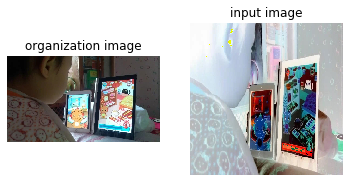

621 笔记本电脑     



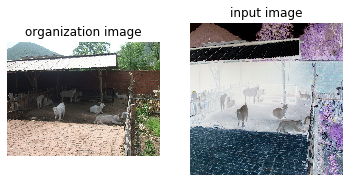

342 猪     



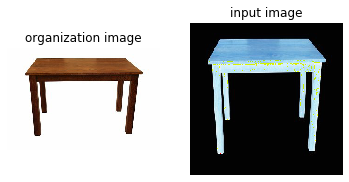

533 餐桌板     



In [7]:
checkpoint_file = r'./pnasnet-5_large_2017_12_13/model.ckpt'   #定义模型路径
saver = tf.train.Saver()                                #定义saver，用于加载模型
with tf.Session() as sess:                              #建立会话
    saver.restore(sess, checkpoint_file)                #载入模型

    def preimg(img):                                    #定义图片预处理函数
        ch = 3
        if img.mode=='RGBA':                            #兼容RGBA图片
            ch = 4

        imgnp = np.asarray(img.resize((image_size,image_size)),
                          dtype=np.float32).reshape(image_size,image_size,ch)
        return imgnp[:,:,:3]
    #获得原始图片与预处理图片
    batchImg = [ preimg( Image.open(imgfilename) ) for imgfilename in sample_images ]
    orgImg = [  Image.open(imgfilename)  for imgfilename in sample_images ]

    yv,img_norm = sess.run([y,x1], feed_dict={input_imgs: batchImg})    #输入到模型

    print(yv,np.shape(yv))                                  #显示输出结果
    def showresult(yy,img_norm,img_org):                    #定义显示图片函数
        plt.figure()
        p1 = plt.subplot(121)
        p2 = plt.subplot(122)
        p1.imshow(img_org)# 显示图片
        p1.axis('off')
        p1.set_title("organization image")

        p2.imshow((img_norm * 255).astype(np.uint8))# 显示图片
        p2.axis('off')
        p2.set_title("input image")

        plt.show()

        print(yy,labels[yy])

    for yy,img1,img2 in zip(yv,batchImg,orgImg):            #显示每条结果及图片
        showresult(yy,img1,img2)

